In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt

from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from google.colab.patches import cv2_imshow
from PIL import Image
import os
from __future__ import print_function
import keras
import pandas as pd
from pandas import DataFrame as df 


from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,MaxPooling2D
from skimage import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model,load_model 

In [ ]:
#code to resize
source_folder = '/content/drive/MyDrive/project/test_folder/others'
destination_folder = '/content/drive/MyDrive/project/test_size/others/'
directory = os.listdir(source_folder)
new_image_width=150
new_image_height=150
for item in directory:
  img = Image.open(source_folder +'/'+ item)
  imgResize = img.resize((new_image_width, new_image_height), Image.ANTIALIAS)
  imgResize.save(destination_folder + item[:-4] +'.png', quality = 90)

In [ ]:
img=cv2.imread('/content/drive/MyDrive/project/test_size/others/others..png',cv2.IMREAD_COLOR)
#print(img)

In [ ]:
print(img)

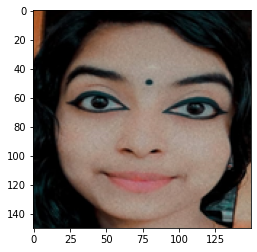

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

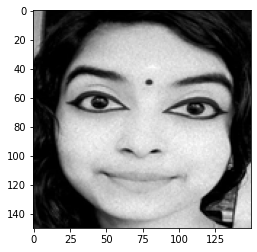

In [ ]:
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg,cmap='gray')
#print(grayimg)

In [ ]:
#landmark predictor download
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2021-06-06 04:32:16--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  75.9MB/s    in 0.8s    

2021-06-06 04:32:17 (75.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



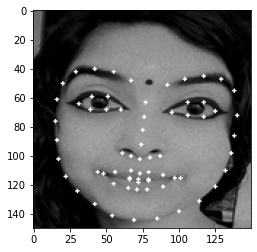

In [ ]:
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #landmark detector
detector=dlib.get_frontal_face_detector()                                 #face detector
face=detector(grayimg)    #rectangles[[(65, 77) (169, 181)]]

for points in face:
  x1,y1=points.left(),points.top()
  x2,y2=points.right(),points.bottom()
  landmarks=predictor(grayimg,points)
  mypoints=[]
  for n in range(68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    mypoints.append([x,y])
    cv2.circle(grayimg,(x,y),1,(255,255,255),cv2.FILLED)
  mypoints=np.array(mypoints)  
plt.imshow(grayimg,cmap='gray') 
#print(mypoints)  

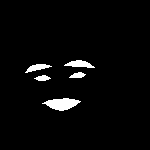

In [ ]:
mask=np.zeros_like(grayimg)
lefteye=mypoints[36:42]
lefteyemask=cv2.fillPoly(mask,[lefteye],(255,255,255))
righteye=mypoints[42:48]
righteyemask=cv2.fillPoly(mask,[righteye],(255,255,255))
lefteyebrow=mypoints[17:22]
lefteyebrowmask=cv2.fillPoly(mask,[lefteyebrow],(255,255,255))
righteyebrow=mypoints[22:27]
righteyebrowmask=cv2.fillPoly(mask,[righteyebrow],(255,255,255))
lip=mypoints[48:61]
lipmask=cv2.fillPoly(mask,[lip],(255,255,255))
cv2_imshow(mask)


In [ ]:
l=['veeram','bhayanakam','bheebhalsam','karunam','others']

In [ ]:
datagen=ImageDataGenerator(
					rotation_range=30,
					shear_range=0.2,
					zoom_range=0.2,
					width_shift_range=0.2,
					height_shift_range=0.2,
					horizontal_flip=True,
					fill_mode='nearest')

In [ ]:
#detection,mask,augmentation
def preprocess():
  source_folder = '/content/drive/MyDrive/project/test_size/'
  destination_folder = '/content/drive/MyDrive/project/aug_test/'
  for i in l:
    new_s=source_folder+i
    new_d=destination_folder+i+'/'
    directory=os.listdir(new_s)
    print(directory)
    for item in directory:
      img=cv2.imread(new_s+'/'+item)
      grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #landmark detector
      detector=dlib.get_frontal_face_detector()                                 #face detector
      face=detector(grayimg)    #rectangles[[(65, 77) (169, 181)]]
    
      for points in face:
        x1,y1=points.left(),points.top()
        x2,y2=points.right(),points.bottom()
        landmarks=predictor(grayimg,points)
        mypoints=[]
        for n in range(68):
          x=landmarks.part(n).x
          y=landmarks.part(n).y
          mypoints.append([x,y])
          #cv2.circle(grayimg,(x,y),1,(255,255,255),cv2.FILLED)
        mypoints=np.array(mypoints)  
          #plt.imshow(grayimg,cmap='gray') 
      mask=np.zeros_like(grayimg)
      lefteye=mypoints[36:42]
      lefteyemask=cv2.fillPoly(mask,[lefteye],(255,255,255))
      righteye=mypoints[42:48]
      righteyemask=cv2.fillPoly(mask,[righteye],(255,255,255))
      lefteyebrow=mypoints[17:22]
      lefteyebrowmask=cv2.fillPoly(mask,[lefteyebrow],(255,255,255))
      righteyebrow=mypoints[22:27]
      righteyebrowmask=cv2.fillPoly(mask,[righteyebrow],(255,255,255))
      lip=mypoints[48:61]
      lipmask=cv2.fillPoly(mask,[lip],(255,255,255))
      x=img_to_array(mask)
      x = x.reshape((1,) + x.shape)
      count = 0
      for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=new_d, save_prefix=item, save_format='png'):
        count=count+1
        if(count==20):
          break
     



In [ ]:
preprocess()

['veeram..png']
['bhayanakam..png']
['bheebhalsam..png']
['karunam..png']
['others..png']


In [ ]:
#count images in a folder
source_folder = '/content/drive/MyDrive/project/augmented/'
directory = os.listdir(source_folder)
print(directory)
total=0
for i in directory:
  items=os.listdir(source_folder+i+'/')
  print("number of ",i," images: ",len(items))
  total+=len(items)
print("total number of images in dataset:",total)

['veeram', 'karunam', 'bhayanakam', 'bheebhalsam', 'others']
number of  veeram  images:  778
number of  karunam  images:  580
number of  bhayanakam  images:  720
number of  bheebhalsam  images:  620
number of  others  images:  1966
total number of images in dataset: 4664


In [ ]:
#creating list for dataframe
images=[]
labels=[]

In [ ]:
#appending to list
c=0
source_folder = '/content/drive/MyDrive/project/augmented/'
directory = os.listdir(source_folder)
print(directory)
for i in directory:
  print(i)
  items=os.listdir(source_folder+i+'/')
  for j in items:
    images.append(cv2.imread(source_folder+i+'/'+j))
    labels.append(c)
  c=c+1  

['veeram', 'karunam', 'bhayanakam', 'bheebhalsam', 'others']
veeram
karunam
bhayanakam
bheebhalsam
others


In [ ]:
print(labels[779])

1


In [ ]:
#creating dataframe
table=df()
table['image']=images
table['class']=labels

In [ ]:
X=table['image']
Y=table['class']

In [ ]:
print(table)

                                                  image  class
0     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
3     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
4     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
...                                                 ...    ...
4659  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      4
4660  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      4
4661  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      4
4662  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      4
4663  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      4

[4664 rows x 2 columns]


In [ ]:
X.shape

(4664,)

In [ ]:
#to reshape and to convert to binary
x=[]
for i in X:
  x.append(i)
x=np.array(x)  
x=x/255



In [ ]:
x.shape

(4664, 150, 150, 3)

In [ ]:
print(x)
[[[1]]] in x

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.10,shuffle=True,random_state=1,stratify=Y)

In [ ]:
Y_train.shape

(4197,)

In [ ]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [ ]:
X_train.shape

(4893, 150, 150, 3)

In [ ]:
Y_train.shape


(4197, 5)

In [ ]:
len(Y_test)     #number of test images, X_test is also fine

467

In [ ]:
!pip install keras_efficientnets

In [ ]:
from tensorflow.keras.applications import EfficientNetB5

In [ ]:
base_model=EfficientNetB5(include_top=False, weights="imagenet", input_shape=(150,150,3),classes=5)

115269632/115263384 [==============================] - 2s 0us/step


In [ ]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(5,activation=('softmax'))) 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,epochs=35,validation_data=(X_test,Y_test))

Epoch 1/35
132/132 [==============================] - 147s 578ms/step - loss: 1.8481 - accuracy: 0.3492 - val_loss: 1.5737 - val_accuracy: 0.4218
Epoch 2/35
132/132 [==============================] - 73s 556ms/step - loss: 1.4031 - accuracy: 0.4123 - val_loss: 1.5123 - val_accuracy: 0.4218
Epoch 3/35
132/132 [==============================] - 73s 552ms/step - loss: 1.2117 - accuracy: 0.4976 - val_loss: 1.4301 - val_accuracy: 0.4283
Epoch 4/35
132/132 [==============================] - 73s 555ms/step - loss: 1.0893 - accuracy: 0.5712 - val_loss: 1.7428 - val_accuracy: 0.4261
Epoch 5/35
132/132 [==============================] - 74s 562ms/step - loss: 0.9425 - accuracy: 0.6248 - val_loss: 1.5189 - val_accuracy: 0.4283
Epoch 6/35
132/132 [==============================] - 74s 562ms/step - loss: 0.8753 - accuracy: 0.6740 - val_loss: 1.4961 - val_accuracy: 0.4347
Epoch 7/35
132/132 [==============================] - 74s 563ms/step - loss: 0.6945 - accuracy: 0.7383 - val_loss: 1.5586 - val_a

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)
print("model, accuracy: {:5.2f}%".format(100 * acc))

15/15 - 45s - loss: 0.4799 - accuracy: 0.8651
model, accuracy: 86.51%


In [ ]:
predictions=model.predict(X_test)


In [ ]:
print(predictions[2])

[9.5051980e-01 1.6023562e-03 4.4878307e-03 6.5886430e-05 4.3324169e-02]


In [ ]:
print(Y_test[2])

[1. 0. 0. 0. 0.]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


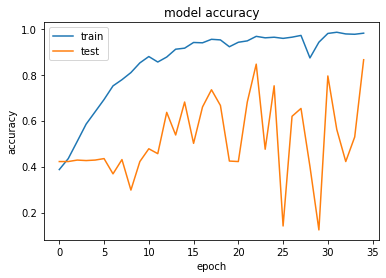

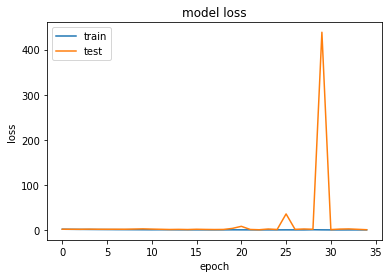

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


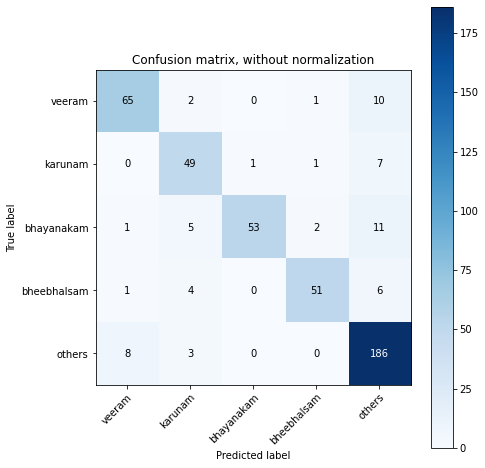

In [ ]:
#Making prediction
y_pred=model.predict_classes(X_test)
y_true=np.argmax(Y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['veeram', 'karunam', 'bhayanakam', 'bheebhalsam', 'others']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


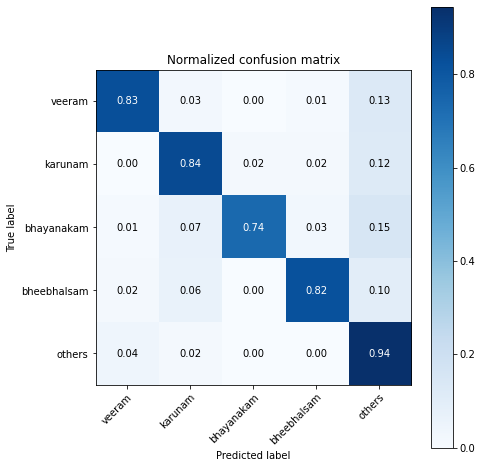

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

NameError: ignored

In [ ]:
y_pred=model.predict_classes(X_test)
y_true=np.argmax(Y_test,axis=1)
print(y_pred)
print(y_true)

In [ ]:
filepath='/content/drive/MyDrive/project/acc86.hdf5'

In [ ]:
model.save_weights(filepath)

In [ ]:
model.load_weights(filepath)

In [ ]:
model.evaluate(X_test,Y_test)

15/15 [==============================] - 1s 77ms/step - loss: 0.4799 - accuracy: 0.8651


[0.47991955280303955, 0.8650963306427002]

In [ ]:
model_prediction=model.predict(X_test)

In [ ]:
print(model_prediction[330])

[5.3803064e-04 1.8636610e-04 3.6660093e-03 3.6678382e-05 9.9557292e-01]


In [ ]:
print(Y_test[330])

[0. 0. 0. 0. 1.]


In [ ]:
import random


In [ ]:
d={0:'veeram',1:'karunam',2:'bhayanakam',3:'bheebhalsam',4:'others'}

In [ ]:
for i in range(10):
  j=random.randint(0,len(Y_test)-1)  
  print(j)  #last number included
  predicted=np.argmax(model_prediction[j])
  actual=np.argmax(Y_test[j]) 
  print("predicted value:",d[predicted],end=", ")
  print("actual value:",d[actual])

103
predicted value: bheebhalsam, actual value: bheebhalsam
176
predicted value: bheebhalsam, actual value: bheebhalsam
297
predicted value: bhayanakam, actual value: bhayanakam
445
predicted value: others, actual value: others
184
predicted value: bheebhalsam, actual value: bheebhalsam
408
predicted value: karunam, actual value: karunam
53
predicted value: others, actual value: others
78
predicted value: others, actual value: others
166
predicted value: karunam, actual value: karunam
231
predicted value: veeram, actual value: veeram


In [ ]:
source_folder = '/content/drive/MyDrive/project/check/'
destination_folder = '/content/drive/MyDrive/project/check/'
directory = os.listdir(source_folder)
new_image_width=150
new_image_height=150
#for item in directory:
 # img = Image.open(source_folder +'/'+ item)
  #imgResize = img.resize((new_image_width, new_image_height), Image.ANTIALIAS)
  #imgResize.save(destination_folder + item[:-4] +'.png', quality = 90)

In [ ]:
for item in directory:
  print(item)
  print(item[:-4])          #removes last 4 letters to convert to common png format

sreelak.png
sreelak


In [ ]:
x=img_to_array(mask)
x = x.reshape((1,) + x.shape)
count = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/project/check_aug/', save_prefix='aug', save_format='png'):
  count=count+1
  if(count==20):
    break
  
        

In [ ]:
img=cv2.imread('/content/drive/MyDrive/project/test_size/others/others..png')

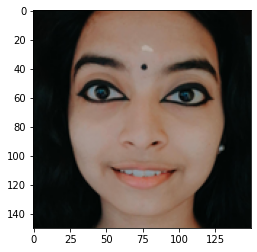

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

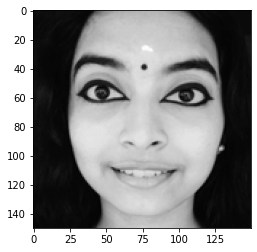

In [ ]:
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg,cmap='gray')
#print(grayimg)

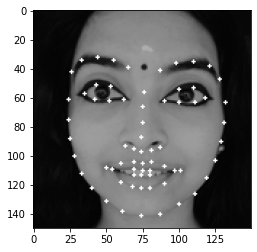

In [ ]:
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #landmark detector
detector=dlib.get_frontal_face_detector()                                 #face detector
face=detector(grayimg)    #rectangles[[(65, 77) (169, 181)]]

for points in face:
  x1,y1=points.left(),points.top()
  x2,y2=points.right(),points.bottom()
  landmarks=predictor(grayimg,points)
  mypoints=[]
  for n in range(68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    mypoints.append([x,y])
    cv2.circle(grayimg,(x,y),1,(255,255,255),cv2.FILLED)
  mypoints=np.array(mypoints)  
plt.imshow(grayimg,cmap='gray') 
#print(mypoints)  

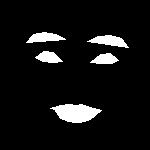

In [ ]:
mask=np.zeros_like(grayimg)
lefteye=mypoints[36:42]
lefteyemask=cv2.fillPoly(mask,[lefteye],(255,255,255))
righteye=mypoints[42:48]
righteyemask=cv2.fillPoly(mask,[righteye],(255,255,255))
lefteyebrow=mypoints[17:22]
lefteyebrowmask=cv2.fillPoly(mask,[lefteyebrow],(255,255,255))
righteyebrow=mypoints[22:27]
righteyebrowmask=cv2.fillPoly(mask,[righteyebrow],(255,255,255))
lip=mypoints[48:61]
lipmask=cv2.fillPoly(mask,[lip],(255,255,255))
cv2_imshow(mask)


In [ ]:
img=np.array(img)

In [ ]:
img=img.reshape((1,)+img.shape)

In [ ]:
pred=model.predict(img)

In [ ]:
print(pred[0])

[0.0000000e+00 1.0000000e+00 2.3416677e-17 0.0000000e+00 0.0000000e+00]


In [ ]:
print(d[np.argmax(pred[0])])

karunam
